In [32]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from matplotlib import colors
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm
from astropy import units as u
from speclite import filters

repo_dir = '/grad/bwedig/mejiro'
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

from mejiro.instruments.hwo import HWO
from mejiro.utils import util

%matplotlib inline

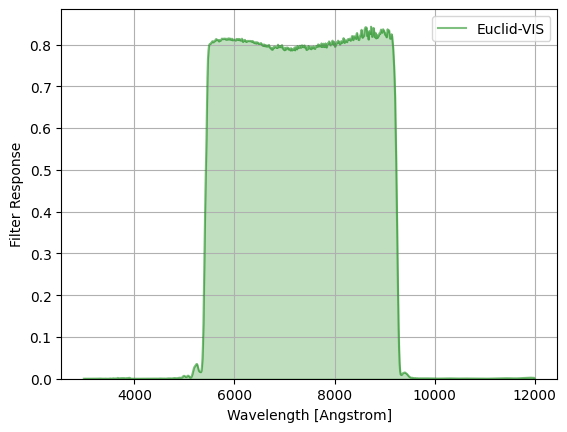

In [33]:
euclid = filters.load_filters('Euclid-VIS')
filters.plot_filters(euclid)

In [34]:
hwo = HWO()
bandwidths = hwo.camera.recover('derived_bandpass').to(u.Angstrom)
pprint(bandwidths) 

pivotwaves = hwo.camera.recover('pivotwave').to(u.Angstrom)
pprint(pivotwaves)

<Quantity [ 450.,  550.,  672.,  950., 1212., 1550., 1700., 2520., 3200.,
           4440.] Angstrom>
<Quantity [ 2250.,  2750.,  3360.,  4750.,  6060.,  7750.,  8500., 12600.,
           16000., 22200.] Angstrom>


In [41]:
response = 0.8

for band, bandwidth, pivotwave in zip(hwo.bands, bandwidths, pivotwaves):
    left_edge = round(pivotwave.value - (bandwidth.value / 2))
    right_edge = round(pivotwave.value + (bandwidth.value / 2))
    wavelengths = np.arange(left_edge, right_edge, 100)
    responses = response * np.ones(len(wavelengths))

    hdi = filters.FilterResponse(
        wavelength=[left_edge - 100, *wavelengths, right_edge + 100] * u.Angstrom,
        response=[0, *responses, 0], meta=dict(group_name='HRI', band_name=band))
    hdi_name = hdi.save(os.path.join(repo_dir, 'mejiro', 'data', 'hwo_filter_response'))
    print(f'HDI filter saved as {hdi_name}')

HDI filter saved as /grad/bwedig/mejiro/mejiro/data/hwo_filter_response/HRI-FUV.ecsv
HDI filter saved as /grad/bwedig/mejiro/mejiro/data/hwo_filter_response/HRI-NUV.ecsv
HDI filter saved as /grad/bwedig/mejiro/mejiro/data/hwo_filter_response/HRI-U.ecsv
HDI filter saved as /grad/bwedig/mejiro/mejiro/data/hwo_filter_response/HRI-B.ecsv
HDI filter saved as /grad/bwedig/mejiro/mejiro/data/hwo_filter_response/HRI-V.ecsv
HDI filter saved as /grad/bwedig/mejiro/mejiro/data/hwo_filter_response/HRI-R.ecsv
HDI filter saved as /grad/bwedig/mejiro/mejiro/data/hwo_filter_response/HRI-I.ecsv
HDI filter saved as /grad/bwedig/mejiro/mejiro/data/hwo_filter_response/HRI-J.ecsv
HDI filter saved as /grad/bwedig/mejiro/mejiro/data/hwo_filter_response/HRI-H.ecsv
HDI filter saved as /grad/bwedig/mejiro/mejiro/data/hwo_filter_response/HRI-K.ecsv


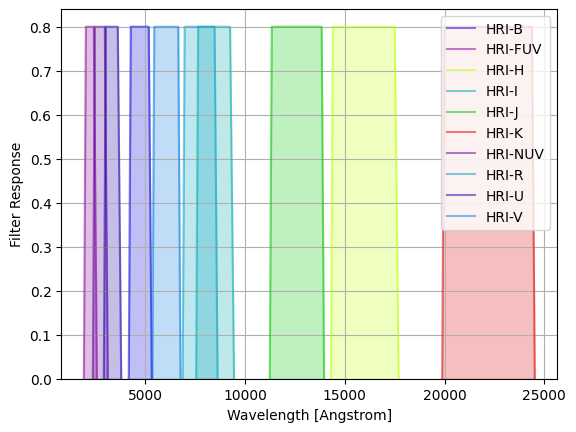

In [42]:
speclite_filters = HWO.load_speclite_filters()

filters.plot_filters(speclite_filters)

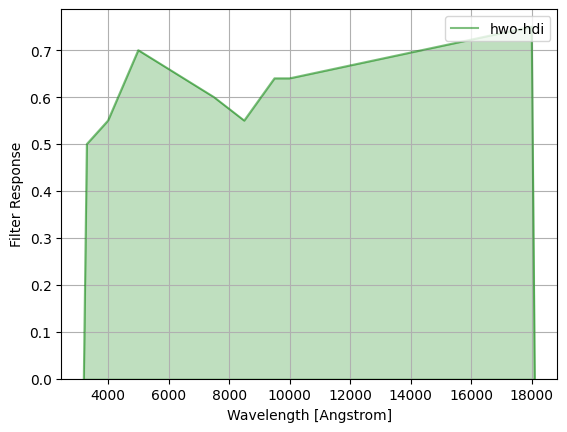

In [39]:
hdi_filter_response = filters.FilterResponse(
    wavelength=[3200, 3300, 4000, 5000, 7500, 8500, 9500, 10000, 18000, 18100] * u.Angstrom,
    response=[0, 0.5, 0.55, 0.7, 0.6, 0.55, 0.64, 0.64, 0.75, 0], meta=dict(group_name='hwo', band_name='hdi'))

hdi_filter = filters.load_filters('hwo-hdi')
filters.plot_filters(hdi_filter)
# hdi_name = hdi.save(os.path.join(repo_dir, 'mejiro', 'data'))